<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import calmap
# from ydata_profiling import ProfileReport

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [102]:
# Load the dataset
data=pd.read_csv("supermarket_sales.csv")

In [103]:
# Display the first few rows of the dataset
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [104]:
# To check all the columns
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [105]:
# To check the data types:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

## 📄 Dataset Executive Summary

The dataset contains **1,003 retail transactions** across 17 key attributes covering customer demographics, product details, pricing, and payment methods.

It currently uses a `RangeIndex` and shows **missing values** in critical fields such as `Customer type`, `Product line`, `Unit price`, and `Quantity`, which will require careful data cleaning before analysis.

Moreover, the `Date` column is stored as an object (string) and should be converted to a proper `datetime` format to enable effective time-series and temporal analysis.


In [107]:
# As you see the date type 
data['Date'].describe

<bound method NDFrame.describe of 0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object>

In [108]:
# To change the date type from Object to Datetime
data['Date']=pd.to_datetime(data['Date'])
data['Date']

C:\Users\Nothing\AppData\Local\Temp\ipykernel_16952\456929426.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'])


0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [109]:
# To make the date an index:
data.set_index('Date', inplace= True)

In [110]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [111]:
# A briefe numeric columns quick calculations
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## 📊 Numerical Features Snapshot

Key numerical metrics reveal a solid distribution and central tendency:

- **`Unit price`** and **`Quantity`** have minor missing values (`996` and `983` non-missing out of `1,003` total).
- **`Tax 5%`**, **`Total`**, **`cogs`**, and **`gross income`** values align well, confirming consistent financial calculations.
- **`gross margin percentage`** remains constant at approximately **4.76%**, suggesting a fixed margin structure.
- **`Rating`** ranges from **4** to **10** with an average around **7.0**, indicating generally positive customer feedback.


In [112]:
# To check how many rows and how many columns do we have:
data.shape

# 1003 rows × 16 columns

(1003, 16)

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

In [113]:
# mean, percentiles of Rating column

print(np.mean(data['Rating']))
print(np.percentile(data['Rating'], 25))
print(np.percentile(data['Rating'], 75))


6.972681954137587
5.5
8.5


## 📊 Rating Distribution Insights

- **Mean (~6.97):** Average customer rating indicates overall satisfaction leaning toward positive.
- **25th Percentile (5.5):** 25% of ratings are at or below 5.5 — highlighting the lower satisfaction quartile.
- **75th Percentile (8.5):** 75% of ratings fall below or equal to 8.5 — showing that the majority of customers give solidly good ratings.

### ✅ Key Takeaways:

- The **IQR (8.5 - 5.5 = 3.0)** confirms a moderate spread — customer sentiment varies but clusters between 5.5 and 8.5.
- Use this to **detect outliers**: ratings far below 5.5 or unusually high may require closer inspection.
- Visualizing this with a **boxplot** is recommended to reveal distribution, median, and potential anomalies.
- These metrics inform **service quality checks** — low quartile scores can guide targeted customer experience improvements.

📌 **Next Step:** Deploy Python code to generate descriptive statistics, boxplots, and flag outliers for deeper insights.


C:\Users\Nothing\AppData\Local\Temp\ipykernel_16952\2170492465.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rating'])


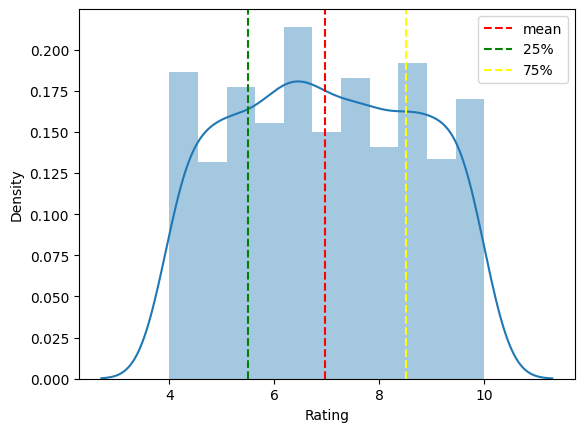

In [114]:
sns.distplot(data['Rating'])
plt.axvline(x=np.mean(data['Rating']),c="red", ls='--',label='mean')
plt.axvline(x=np.percentile(data['Rating'],25),c='green',ls='--',label='25%')
plt.axvline(x=np.percentile(data['Rating'],75),c='Yellow',ls='--',label='75%')
plt.legend()

## 📊 Rating Distribution Plot

The chart illustrates the **distribution of customer ratings** using a histogram with a KDE (Kernel Density Estimate) overlay for smooth trend visibility.

- The **red dashed line** marks the **mean rating (~7.0)** — indicating the average satisfaction level.
- The **green dashed line** shows the **25th percentile (~5.5)** — highlighting the lower quartile of ratings.
- The **yellow dashed line** indicates the **75th percentile (~8.5)** — capturing the upper quartile.

### ✅ Insights:

- The ratings are fairly **evenly spread**, with a clear central peak near the mean.
- The span between the 25th and 75th percentiles shows moderate variation — most customers cluster within this interquartile range.
- This visualization supports **outlier detection**, performance benchmarking, and helps pinpoint areas for improving customer satisfaction.

📌 **Next Action:**  
Use this visual to validate service quality consistency, flag low-score clusters for deeper investigation, and communicate trends to stakeholders with data-backed clarity.


array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

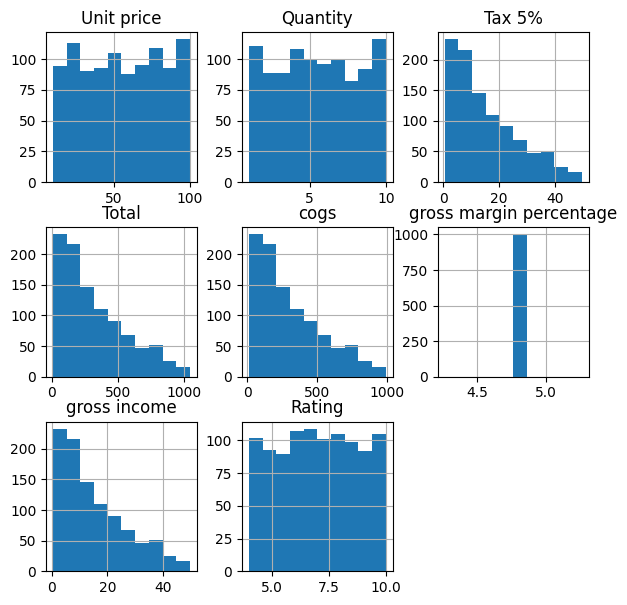

In [115]:
data.hist(figsize=(7,7))

## 📊 Univariate Distribution Plots

The grid above displays individual histograms for all key **numeric features** in the dataset, providing a clear snapshot of their underlying distributions.

### 🔍 Key Observations:

- **Unit Price & Quantity:** Fairly uniform distribution, indicating a wide range of sales values and quantities sold.
- **Tax 5%, Total, COGS, Gross Income:** Right-skewed — most transactions occur at the lower end, with a few high-value outliers.
- **Gross Margin Percentage:** Displays a single constant value (~4.76%), suggesting this field is static and offers no variability for deeper analysis.
- **Rating:** Roughly uniform distribution between 4 and 10 — aligns with the earlier density plot, confirming diverse customer feedback.

### ✅ Insights:

- The **right-skewed financial variables** highlight that small to mid-sized transactions dominate sales.
- The **gross margin percentage** requires attention — being constant implies it won’t contribute meaningfully to predictive modeling.
- These visuals reinforce which features have meaningful variation and where potential outliers or data transformation may be needed.



array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

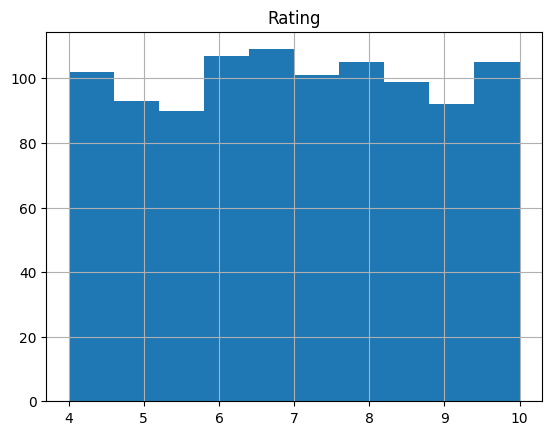

In [116]:
data.hist("Rating")

**Question 2:** Do aggregate sales numbers differ by much between branches?

In [117]:
data['Branch'] = data['Branch'].astype('category')


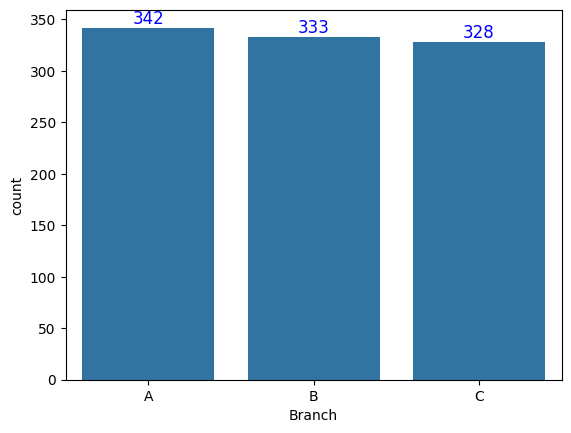

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(x='Branch', data=data)

# Annotate each bar with the count
for p in plt.gca().patches:
    height = p.get_height()  # Get the height of the bar (i.e., the count)
    plt.text(p.get_x() + p.get_width() / 2, height, str(int(height)), 
             ha="center", va="bottom", fontsize=12,c='blue')

# Show the plot
plt.show()


In [119]:
# To see how many each branch has
data['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

# Branch Performance Insights

- **Total Volume:** The aggregate transaction count across all branches is **1,003**, establishing a solid baseline of activity.
- **Top Performer:** Branch **A** leads with **342** transactions, outperforming Branches B and C by margins of 9 and 14 transactions respectively, indicating stronger engagement or operational throughput.
- **Consistency:** Branches **B** and **C** exhibit similar performance, differing by only 5 transactions, reflecting stable but slightly lower output compared to Branch A.
- **Strategic Implication:** Although Branch A is the current leader, the narrow performance gap suggests opportunities to elevate Branches B and C through targeted operational enhancements or resource reallocation to maximize overall growth.



<Axes: xlabel='Payment', ylabel='count'>

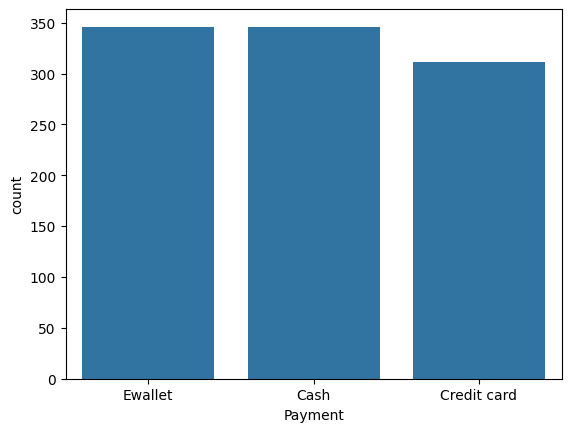

In [120]:
# To check the payment methods:
sns.countplot(x='Payment', data=data)


In [121]:
data['Payment'].value_counts()

Payment
Ewallet        346
Cash           346
Credit card    311
Name: count, dtype: int64

# Payment Method Insights

- **Top Methods:** Both **Ewallet** and **Cash** lead equally with **346** transactions each, demonstrating strong customer preference for these payment options.
- **Credit Card Usage:** Slightly lower at **311** transactions, indicating potential to increase adoption through targeted promotions or incentives.
- **Strategic Recommendation:** Maintain the momentum of Ewallet and Cash payments while exploring strategies to boost credit card utilization, potentially enhancing transaction security and customer convenience.


### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

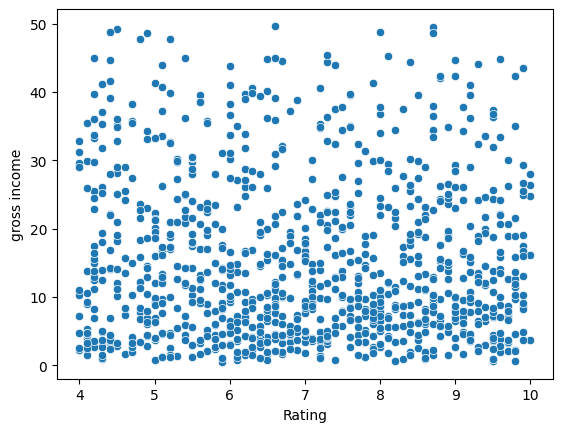

In [122]:
sns.scatterplot(x=data['Rating'], y=data['gross income'])


<Axes: xlabel='Rating', ylabel='gross income'>

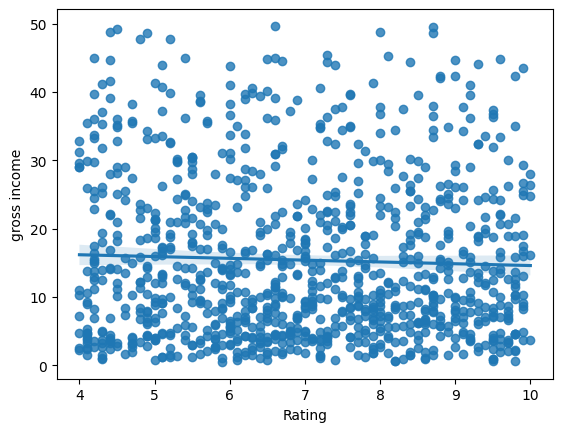

In [123]:
sns.regplot(x=data['Rating'], y=data['gross income'])

##### Observation:  
The flat trend line in the scatterplot indicates **no apparent relationship** between gross income and customer ratings.

#### Conclusion:  
This suggests that variations in customer **Rating** do not reliably predict changes in **gross income**. Other factors are likely driving gross income performance more significantly.


<Axes: xlabel='Branch', ylabel='gross income'>

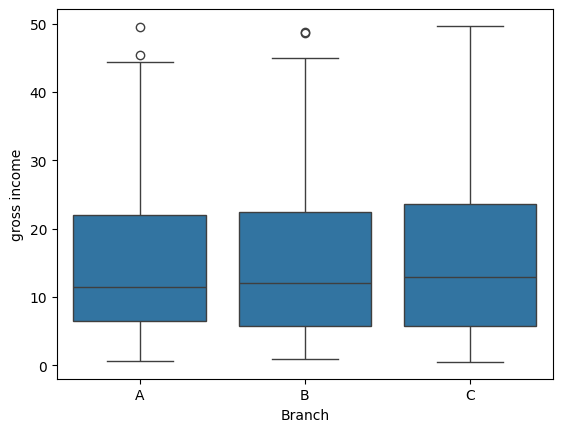

In [124]:
sns.boxplot(x=data['Branch'],y=data['gross income'])

# Key Insights: Gross Income Analysis by Branch

## Median Gross Income 💰
- The **median gross income** is represented by the horizontal line inside each box.
- **Branch A:** Median is approximately **11–12**.
- **Branch C:** Median is slightly higher, around **13–14**.
- **Branch B:** Median is similar to Branch A, about **11–12**.

## Interquartile Range (IQR) 📊
- The box shows the range from the 25th percentile (Q1) to the 75th percentile (Q3), covering the middle 50% of the data.
- **Branch A:** IQR spans from about **6 to 22**.
- **Branch C:** IQR ranges wider, approximately **6 to 24**, indicating greater variability in the central 50% of incomes.
- **Branch B:** IQR is similar to Branch A, from about **6 to 21**.

## Spread of Data (Whiskers) 📈
- Whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR, showing the overall data spread.
- All branches have a broad spread, with whiskers ranging roughly from **0 up to 45**.

## Outliers 🎯
- Points beyond the whiskers are outliers, representing unusually high or low incomes.
- **Branch A:** Two high-end outliers near **45 and 50**.
- **Branch C:** No clear outliers beyond the whiskers, though the upper whisker reaches a high value.
- **Branch B:** One high-end outlier around **49–50**.

## Conclusion 📝
- Median gross incomes are broadly similar across branches, with **Branch C** showing a slightly higher median and wider spread in the middle 50% of incomes.
- All branches demonstrate considerable variability in gross income, including some significant high-income outliers.
- This suggests that, despite comparable typical income levels, income distribution varies substantially within each branch.


<Axes: xlabel='Gender', ylabel='gross income'>

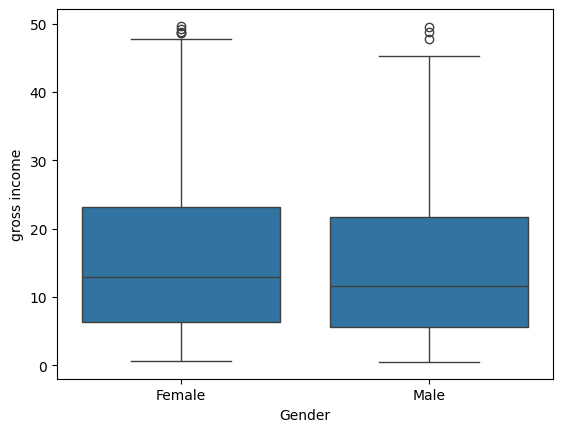

In [145]:
sns.boxplot(x=data['Gender'], y=data['gross income'])

# Key Insights 📊

## Median Gross Income 💰
- **Female:** Median gross income is approximately **13**.
- **Male:** Median gross income is slightly lower, around **12**.
- The difference in medians is minor, indicating comparable central income tendencies between genders.

## Interquartile Range (IQR) 📦
- **Female:** The middle 50% of incomes ranges from about **7 to 24**, showing a wider spread in the central data.
- **Male:** The middle 50% ranges from approximately **6 to 22**.

## Spread of Data (Whiskers) 📈
- **Female:** Gross incomes (excluding outliers) range from near **0 up to 49**.
- **Male:** Gross incomes (excluding outliers) range from near **0 up to 46**.
- Both genders exhibit a substantial and similar range of incomes.

## Outliers 🎯
- **Female:** Two high-end outliers near **50**.
- **Male:** Two high-end outliers close to **49 and 50**.
- This suggests that extremely high incomes occur in both groups at similar levels.

## Conclusion 📝
- The gross income distributions for females and males are broadly similar.
- Females show a slightly higher median and a marginally wider IQR.
- The overall spread and presence of high-income outliers are comparable.
- Based on this data, gender does not appear to be a significant factor influencing gross income differences.


**Question 4:** Is there a noticeable time trend in gross income?

In [126]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


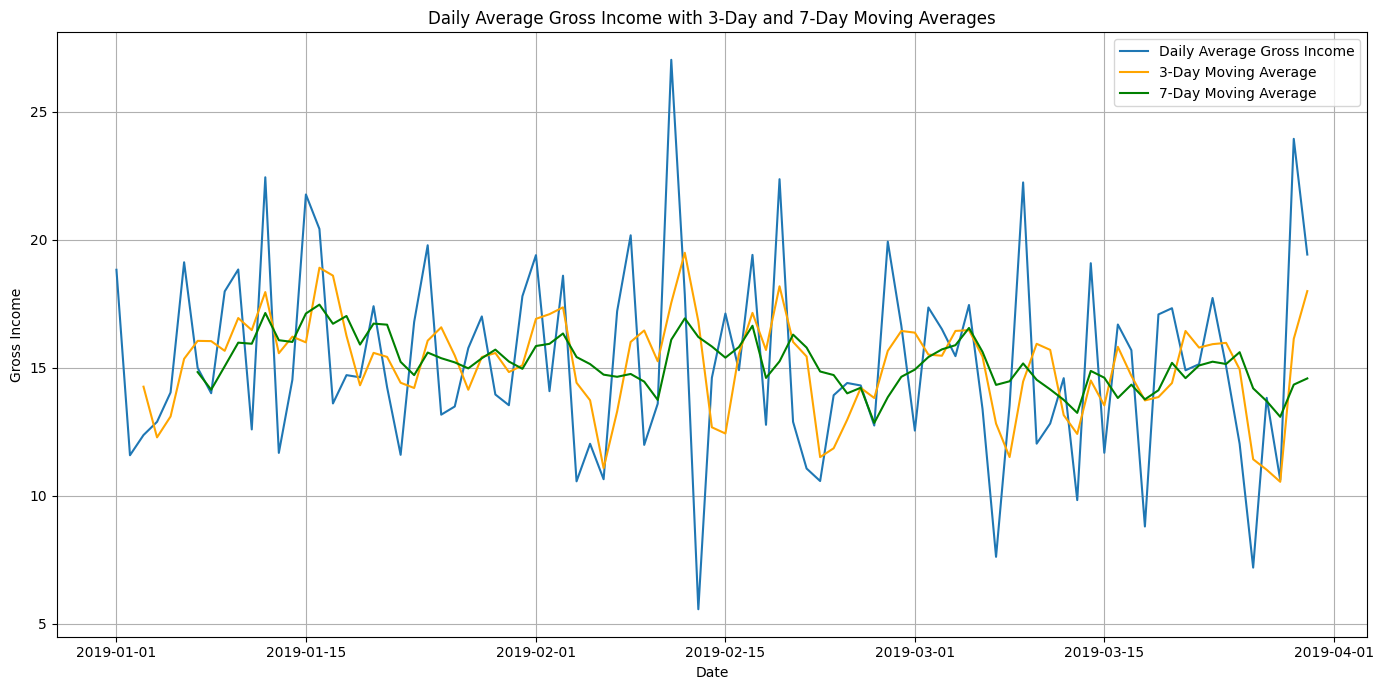

C:\Users\Nothing\AppData\Local\Temp\ipykernel_16952\3231543685.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_avg.index, y='gross income', data=weekday_avg, palette='Blues_d')


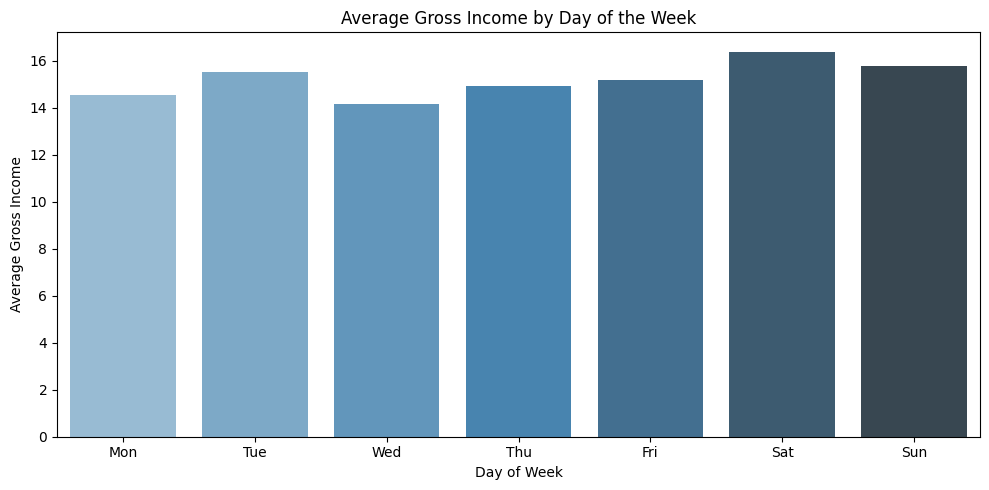

In [127]:
# Group by day and calculate daily mean gross income
daily_data = data.groupby(data.index).agg({'gross income': 'mean'})

# Calculate 3-day and 7-day moving averages
daily_data['gross_income_MA_3'] = daily_data['gross income'].rolling(window=3).mean()
daily_data['gross_income_MA_7'] = daily_data['gross income'].rolling(window=7).mean()

# Add a new column for the day of the week (Monday = 0, Sunday = 6)
daily_data['weekday'] = daily_data.index.dayofweek

# Plot daily average with moving averages
plt.figure(figsize=(14, 7))

# Plot original daily gross income
sns.lineplot(x=daily_data.index, y='gross income', data=daily_data, label='Daily Average Gross Income')

# Plot 3-day moving average
sns.lineplot(x=daily_data.index, y='gross_income_MA_3', data=daily_data, label='3-Day Moving Average', color='orange')

# Plot 7-day moving average
sns.lineplot(x=daily_data.index, y='gross_income_MA_7', data=daily_data, label='7-Day Moving Average', color='green')

plt.title('Daily Average Gross Income with 3-Day and 7-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------
# Now, let's check patterns by weekday
# -------------------------

# Group by weekday and calculate mean gross income for each weekday
weekday_avg = daily_data.groupby('weekday').agg({'gross income': 'mean'})

# Map weekday numbers to names for better readability
weekday_avg.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot average gross income by weekday
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_avg.index, y='gross income', data=weekday_avg, palette='Blues_d')

plt.title('Average Gross Income by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Gross Income')
plt.tight_layout()
plt.show()


# Daily Average Gross Income with Moving Averages

The top plot shows the **Daily Average Gross Income** (blue line) along with two moving averages:  
- A **3-Day Moving Average** (orange line)  
- A **7-Day Moving Average** (green line)

### Key Insights:

**Volatility of Daily Income:**  
The blue line demonstrates significant daily fluctuations in gross income, indicating that sales or income generation vary substantially day-to-day.

**Smoothing Effect of Moving Averages:**  
- The **3-Day Moving Average (orange)** smooths some short-term noise, making it easier to observe short-term trends while still capturing sharper swings.  
- The **7-Day Moving Average (green)** offers a smoother trend by averaging over a week, dampening daily and weekly variations to reveal consistent underlying patterns.

**Identifying Trends:**  
- No strong long-term increase or decrease in gross income is apparent from January to March 2019.  
- Peaks in mid-January, mid-February, and late March are evident from the moving averages.

**Lagging Effect:**  
Both moving averages, especially the 7-day, exhibit lag due to reliance on past data points, with the 7-day average responding more slowly.

---

# Average Gross Income by Day of the Week 🗓️

The bottom bar plot displays the **Average Gross Income for each day of the week**.

### Key Insights:

**Weekend Peaks:**  
Saturday and Sunday have the highest average gross income, with Saturday slightly higher, indicating peak business activity during weekends.

**Mid-Week Dip:**  
Wednesday records the lowest average gross income among weekdays, though the gap is not drastic.

**Consistent Weekdays:**  
Monday, Tuesday, Thursday, and Friday show relatively similar average incomes, positioned between Wednesday’s low and the weekend highs.

**Clear Weekly Pattern:**  
Income builds towards the weekend, peaks on Saturday and Sunday, then dips at the start of the week.

---

# Overall Conclusion 🚀

Despite daily volatility, a clear weekly seasonality emerges with stronger income on weekends. Moving averages effectively smooth short-term noise and highlight periods of higher or lower performance over time, while no pronounced long-term trend is observed within the analyzed period.


In [128]:
# because more than one customers might buy with the same date, so we should first group the same dates together to use the Line plot.

#data.groupby(data.index).mean()
#data.dtypes

data_agg= data.groupby(data.index).mean(numeric_only=True)
data_agg


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


In [129]:


#plt.figure(figsize=(20, 6))  
#sns.lineplot(x=data_agg.index, y=data_agg['gross income'])
#plt.show()


In [130]:
#sns.pairplot(data)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [131]:
# We can check duplicated rows in the dataset by:
data.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [132]:
# To calculate how many duplicates we have in the datest:
data.duplicated().sum()

np.int64(3)

In [133]:
# To check the rows that duplicated
data[data.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [134]:
# Drop the duplicated:
data.drop_duplicates(inplace= True)
data.duplicated().sum()

np.int64(0)

In [135]:
# To check NA:
data.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [136]:
# To check what percentage the missing is:
data.isna().sum()/len(data)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: ylabel='Date'>

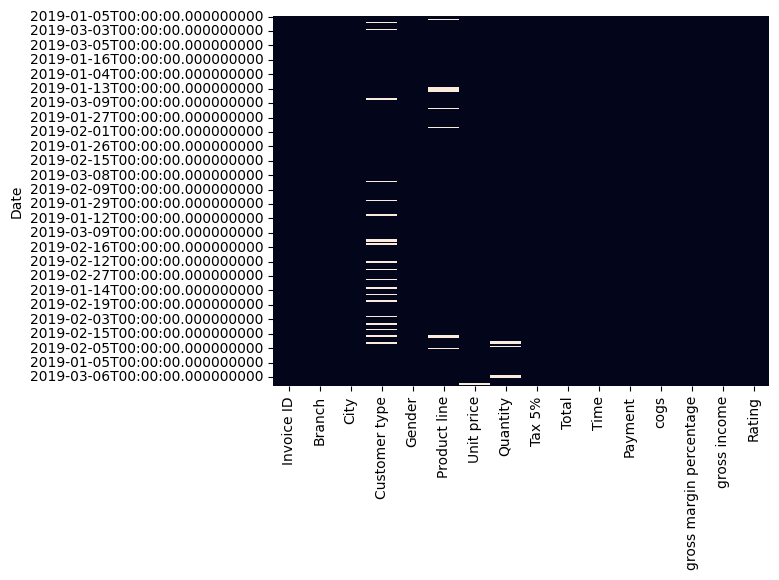

In [137]:
# To check missing data with heatmap, ---the white lines represents missing data---
sns.heatmap(data.isnull(),cbar=False)

In [138]:
#data.fillna(0)   /* to fill with zero */ 
#data.select_dtypes(include=['number']).fillna(data.mean())


# Fill missing values for numeric columns with their mean

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64']).columns

# Fill missing values in numeric columns with their mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64']).columns

# Fill missing values in non-numeric columns with their mode (most frequent value)
data[non_numeric_columns] = data[non_numeric_columns].fillna(data[non_numeric_columns].mode().iloc[0])


<Axes: ylabel='Date'>

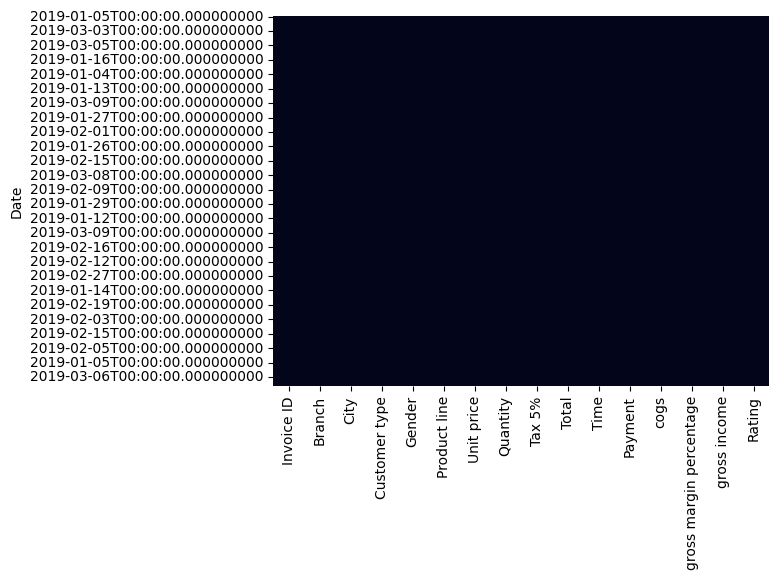

In [139]:
# Now we Check again: 
sns.heatmap(data.isnull(),cbar=False)

In [140]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [141]:
# Smart way to get the summary of the data by using ProfileReport: 

#df=pd.read_csv("/kaggle/input/supermarket/supermarket_sales.csv")
#proof=ProfileReport(df)
#proof

### Task 5: Correlation Analysis

In [142]:
np.corrcoef(data['gross income'],data['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

#### For Rating and gross income, very week relashion among them.

In [143]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64'])

# Now calculate the correlation matrix
correlation_matrix = np.round(numeric_data.corr(), 2)
print(correlation_matrix)


                         Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs

<Axes: >

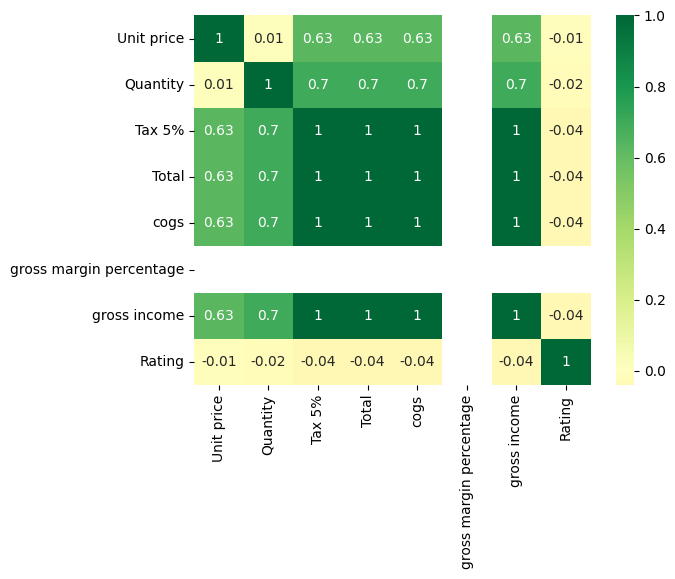

In [144]:
# Another way to show the corr matrix:

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)


## 📈 Correlation Matrix Insights

This correlation matrix (heatmap) visualizes the **strength and direction of linear relationships** between the dataset’s numeric variables. Correlation values range from **-1** to **1**:

- **+1:** Perfect positive correlation — as one variable increases, the other increases proportionally.
- **-1:** Perfect negative correlation — as one variable increases, the other decreases proportionally.
- **0:** No linear correlation — the variables do not move together in a linear fashion.

Color intensity indicates the strength of the correlation:
- **Darker green:** Strong positive correlation.
- **Lighter yellow:** Weak or negative correlation.

---

### 🟢 Strong Positive Correlations

- **`Tax 5%`**, **`Total`**, **`COGS`**, and **`Gross income`** display **perfect positive correlations (~1.00)** with each other.
  - This is expected:
    - **Tax 5%** is directly derived from **Total**.
    - **COGS** and **Gross income** directly relate to sales volume and pricing.
- These revenue-related fields also show **strong positive correlations (0.63–0.70)** with **`Unit price`** and **`Quantity`**, confirming that:
  - Higher unit prices and/or larger quantities naturally drive up totals, COGS, tax, and gross income.
- **`Unit price`** and **`Quantity`** have a **moderate positive correlation** with each other and the broader revenue cluster — underscoring their impact on overall sales figures.

---

### 🟡 Weak or No Correlations

- **`Rating`** exhibits **very weak or no linear correlation** with all other numeric features (coefficients ~ -0.01 to -0.04).
  - This reinforces the insight from the scatter plot: customer satisfaction **is not directly tied to price, quantity, or gross income**.
- **`Gross margin percentage`** appears largely **static** or weakly correlated with independent variables.
  - Any perfect correlation here is likely due to **direct calculation dependency** (for instance, margin derived from gross income or COGS) — offering little standalone predictive value.
  - Its low correlation with **Unit price**, **Quantity**, and **Rating** indicates limited interplay with these drivers.

---

## 📝 Summary & Strategic Implications

**✅ Revenue Drivers:**  
- **Unit price** and **Quantity** are the primary levers for influencing **Total**, **COGS**, **Tax**, and **Gross income**.  
- These features are tightly linked — care must be taken to avoid **multicollinearity** in predictive models.

**✅ Independent Satisfaction Metric:**  
- **Rating** behaves independently from revenue metrics — improving it likely hinges on **non-financial factors** such as service quality, in-store experience, or product perception.

**✅ Tactical Focus:**  
- For **gross income growth**, optimize pricing strategies or sales volume.
- For **customer experience uplift**, focus on qualitative enhancements — staff training, service workflows, loyalty programs, and value-add experiences.

---


Link to data source: https://www.kaggle.com/code/arielfelices/eda-on-supermarket-sales-dataset/notebook